In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer

In [2]:
from google.colab import drive
drive.mount('/content/drive')
p1 = '/content/drive/MyDrive/Colab Notebooks/MVT/Mobile.csv'
df = pd.read_csv(p1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [4]:
df.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [6]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [7]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

##Data Preparation
Data preparation follows a series of steps that starts with collecting the right data, followed by cleaning, labeling, and then validation and visualization.

In [8]:
np.array(df["Screen Size (inches)"])

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.1', '6.7', '6.67', '6.55',
       '6.78', '6.43', '6.5', '6.62', '5.4', '6.7', '6.55', '6.2', '6.51',
       '6.5', '6.43', '6.5', '6.6', '6.5', '6.55', '6.67', '6.1', '6.5',
       '6.5', '6.51', '6.5', '6.7', '6.5', '4.7', '6.5', '6.58', '6.5',
       '6.4', '6.43', '6.5', '6.1', '6.52', '6.5', '6.4', '6.43', '6.67',
       '5.4', '6.44', '6.5', '6.5', '6.52', '6.53', '6.5', '6.51', '6.5',
       '6.5', '6.51', '6.53', '6.7', '6.58', '6.7', '6.55', '6.5', '4.7',
       '6.58', '6.5', '6.5', '6.43', '6.43', '6.1', '6.51', '6.5', '6.6',
       '6.43', '6.55', '6.1', '6.56', '6.5', '6.1', '6.2', '6.43', '6.4',
       '6.67', '6.43', '6.78', '6.55', '6.7', '6.67', '6.1', '6.8 + 3.9',
       '6.67', '4.5', '6.7', '6.67', '6.5', '6.43', '6.58', '6.8', '6.39',
       '6.7', '5.9', '4.5', '5.5', '6.7', '6.7', '6.81', '6.52', '6.51',
       '6.5', '6.5', '6.5', '6.5', '6.5', '6.78', '6.8', '5.99', '6.55',
       '6.5', '6.5', '6.5', '6.5', '6.5', 

In [9]:
df["Price ($)"]=df["Price ($)"].str.extract('(\d+)', expand=False)


In [10]:
df["Price ($)"]

0       999
1      1199
2       899
3       279
4       799
       ... 
402    1049
403     349
404    1099
405     429
406     649
Name: Price ($), Length: 407, dtype: object

In [11]:
df["Price ($)"]=df["Price ($)"].astype(int)

In [12]:
df["RAM "]=df["RAM "].str.replace("GB","")
df["RAM "]=df["RAM "].astype(int)

In [13]:
df["Storage "]=df["Storage "].str.replace("GB","")
df["Storage "]=df["Storage "].astype(int)

In [14]:
df['n_cameras'] = df['Camera (MP)'].str.count('\\+') + 1

In [15]:
res1 = []
res2 = []
res3 = []
res4 = []
for x in df['Camera (MP)']:
    resolutions = x.split('+')
    tam = len(resolutions)

    if tam == 1:
        res1.append(resolutions[0])
        res2.append('0')
        res3.append('0')
        res4.append('0')

    if tam == 2:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append('0')
        res4.append('0')

    if tam == 3:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append('0')

    if tam == 4:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append(resolutions[3])

df['res1'] = res1
df['res2'] = res2
df['res3'] = res3
df['res4'] = res4

df= df.drop(columns='Camera (MP)')
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4
0,Apple,iPhone 13 Pro,128,6,6.1,3095,999,3,12,12,12,0
1,Samsung,Galaxy S21 Ultra,256,12,6.8,5000,1199,4,108,10,10,12
2,OnePlus,9 Pro,128,8,6.7,4500,899,4,48,50,8,2
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,5020,279,4,64,8,5,2
4,Google,Pixel 6,128,8,6.4,4614,799,2,50,12.2,0,0


In [16]:
df['Screen Size (inches)'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')

In [17]:
cem1 = []
cem2 = []
cem3 = []
for x in df['Screen Size (inches)']:
    resolutions = x.split('.')
    tam = len(resolutions)

    if tam == 1:
        cem1.append(resolutions[0])
        cem2.append('0')
        cem3.append('0')

    if tam == 2:
        cem1.append(resolutions[0])
        cem2.append(resolutions[1])
        cem3.append('0')

    if tam == 3:
        cem1.append(resolutions[0])
        cem2.append(resolutions[1])
        cem3.append(resolutions[2])


df['cem1'] = cem1
df['cem2'] = cem2
df['cem3'] = cem3

df= df.drop(columns='Screen Size (inches)')

In [18]:
df["screen"] = df['cem1']+"."+ df["cem2"]
df=df.drop(["cem1","cem2","cem3"],axis=1)
df

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.1
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.8
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.7
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12.2,0,0,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,4300,1049,3,12,64,12,0,6.7
403,Xiaomi,Mi 10 Lite 5G,128,6,4160,349,4,48,8,2,2,6.57
404,Apple,iPhone 12 Pro Max,128,6,3687,1099,3,12,12,12,0,6.7
405,Oppo,Reno3,128,8,4025,429,4,48,13,8,2,6.4


In [19]:
df["screen"]=df["screen"].astype(float)

In [20]:
df["res1"]=df["res1"].str.extract('(\d+)', expand=False)

In [21]:
df["res1"]=df["res1"].astype(int)

In [22]:
df["res2"]=df["res2"].str.extract('(\d+)', expand=False)

In [23]:
df["res2"]=df["res2"].astype(int)

In [24]:
df["res3"]=df["res3"].str.extract('(\d+)', expand=False)

In [25]:
df["res3"]=df["res3"].astype(int)

In [26]:
np.array(df["res4"])

array(['0', ' 12', ' 2', ' 2', '0', '0', '0', ' 2', ' 2', ' 8', '0', ' 5',
       '0', '0', ' 3', '0', '0', '0', '0', ' 2', ' 2', '0', '0', '0',
       ' 2', '0', '0', '0', '0', '0', ' 5', ' 2', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', ' 2', ' 2', '0', '0', '0', '0', ' 2', '0',
       ' 2', '0', '0', '0', ' 5', '0', ' 2', '0', '0', ' 5', ' 2', '0',
       '0', '0', ' 2', ' 5', ' 2', ' 2', '0', '0', '0', '0', ' 2', '0',
       '0', '0', '0', '0', '0', '0', '0', ' 2MP', '0', ' 8MP', ' 2MP',
       '0', '0', '0', '0', '0', '0', ' 5MP', ' 2MP', '0', ' 2MP', '0',
       '0', '0', ' 2MP', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', ' 2MP', '0', ' 2MP', '0', '0', '0',
       ' 2MP', '0', '0', '0', ' 2MP', '0', '0', '0', ' 5MP', ' 2MP', '0',
       '0', ' 5MP', '0', '0', '0', '0', '0', '0', ' 2MP', '0', '0', '0',
       '0', ' 2MP', '0', '0', ' 10MP', '0', '0', '0', '0', '0', ' 2MP',
       '0', '0', '0', '0', '0', '0', '0', '0', ' 2MP

In [27]:
df["res4"]=df["res4"].str.extract('(\d+)', expand=False)

In [28]:
df['res4'].isnull().sum()

1

In [29]:
df['res4'] = df['res4'].fillna(0)

In [30]:
df['res4'].isnull().sum()

0

In [31]:
df['res4'] = df['res4'].astype(int)

In [32]:
df.head()

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.10
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.80
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.70
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12,0,0,6.40


In [33]:
# Select numeric columns for skewness and kurtosis analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [34]:
print(numeric_columns)

Index(['Storage ', 'RAM ', 'Battery Capacity (mAh)', 'Price ($)', 'n_cameras',
       'res1', 'res2', 'res3', 'res4', 'screen'],
      dtype='object')


##Factor Analysis

In [35]:
df_drop=df.drop(labels=['Brand','Model','res1','res2','res3','res4'],axis=1)

In [36]:
fa = FactorAnalyzer()
fa.fit(df_drop)
ev,v = fa.get_eigenvalues()
ev

array([2.57543304, 1.97237333, 0.58540269, 0.35670897, 0.30352582,
       0.20655616])

In [37]:
v

array([ 2.27492014,  1.73706513,  0.16401668,  0.07545653, -0.01989282,
       -0.09327496])

In [38]:
df_drop.shape[1]+1

7

In [39]:
len(ev)

6

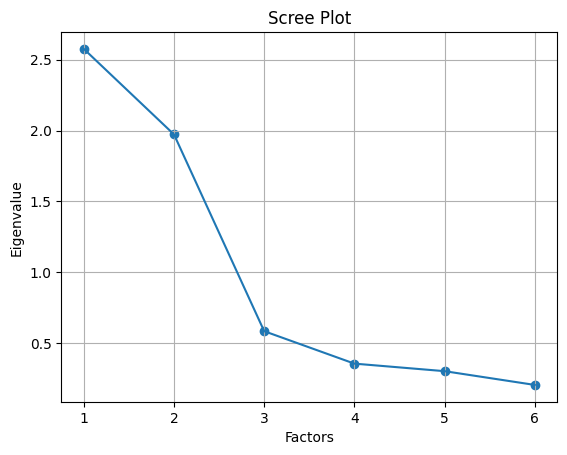

In [40]:
plt.scatter(range(1,df_drop.shape[1]+1),ev)
plt.plot(range(1,df_drop.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [41]:
fa = FactorAnalyzer(6,rotation='varimax')
fa.fit(df_drop)
fa.loadings_

array([[ 0.85813132,  0.12426218,  0.16653399, -0.09250024, -0.10376259,
         0.        ],
       [ 0.75189334,  0.16380394,  0.25533506, -0.00969152,  0.17015059,
         0.        ],
       [-0.24880011,  0.84109939,  0.08725445, -0.19440368, -0.01466264,
         0.        ],
       [ 0.86747679, -0.17121564, -0.11701422,  0.2124522 , -0.00905005,
         0.        ],
       [ 0.21038093,  0.47893856,  0.39703335, -0.01819104,  0.00229296,
         0.        ],
       [ 0.18625102,  0.79835789,  0.0777666 ,  0.11293926,  0.02848282,
         0.        ]])

In [42]:
index_values = df_drop.columns[0:6]

In [43]:
df_drop.shape

(407, 6)

In [45]:
col_names=['Factor1','Factor2','Factor3','Factor4','Factor5','Factor6']
df1=pd.DataFrame(fa.loadings_,index_values,col_names)
df1.head()


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
Storage,0.858131,0.124262,0.166534,-0.092500,-0.103763,0.0
RAM,0.751893,0.163804,0.255335,-0.009692,0.170151,0.0
Battery Capacity (mAh),-0.248800,0.841099,0.087254,-0.194404,-0.014663,0.0
Price ($),0.867477,-0.171216,-0.117014,0.212452,-0.009050,0.0
n_cameras,0.210381,0.478939,0.397033,-0.018191,0.002293,0.0


######Factor1 has high factor loading for Storage, RAM, Price
######Factor2 has high factor loading for n_camera i.e number of cameras